
___
# Linear Regression



an Ecommerce company based in New York City that sells clothing online but they also have in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.

The company is trying to decide whether to focus their efforts on their mobile app experience or their website. help them figure it out! Let's get started!

** Importing pandas, numpy, matplotlib,and seaborn. Then set %matplotlib inline also importing sklearn as I need it.**

In [2]:
#imo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv("Ecommerce Customers")
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.3+ KB


Its a dummy  Ecommerce Customers csv file from the company. It has Customer info, suchas Email, Address, and their color Avatar. Then it also has numerical value columns:

In [5]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [6]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [7]:
sns.set_palette('autumn')
sns.set_style('whitegrid')

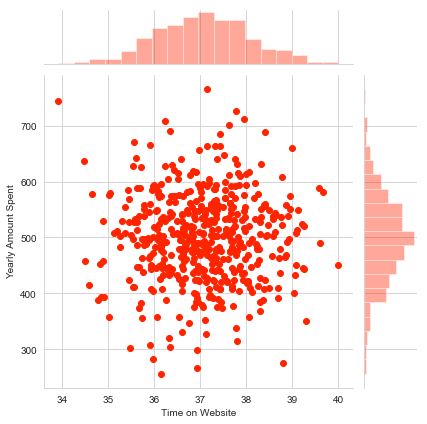

In [8]:
sns.jointplot("Time on Website", "Yearly Amount Spent", data=df)

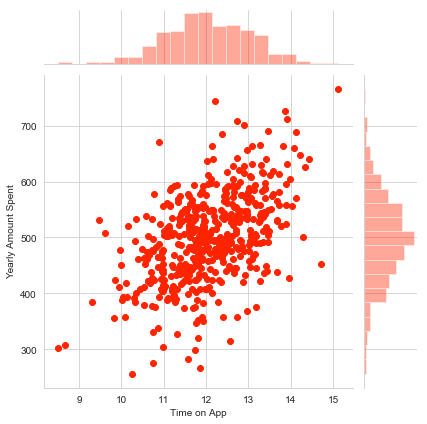

In [9]:
sns.jointplot("Time on App", "Yearly Amount Spent", data=df)

In [10]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
# For Notebooks
init_notebook_mode(connected=True)
# For offline use
cf.go_offline()

In [11]:
df3 = df[df.columns[3:6]]
df3 =df3.loc[:20]
df3.iplot(kind='scatter',colorscale='rdylbu')

** Use jointplot to create a 2D hex bin plot comparing Time on App and Length of Membership.**

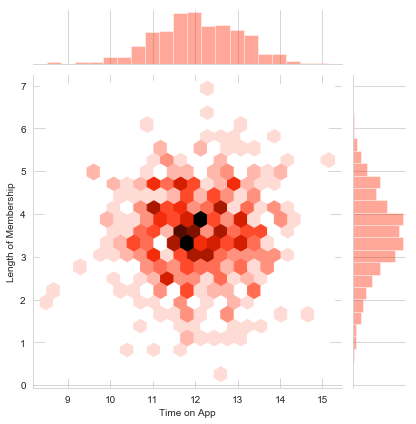

In [13]:
sns.jointplot("Time on App", "Length of Membership", data=df, kind="hex")

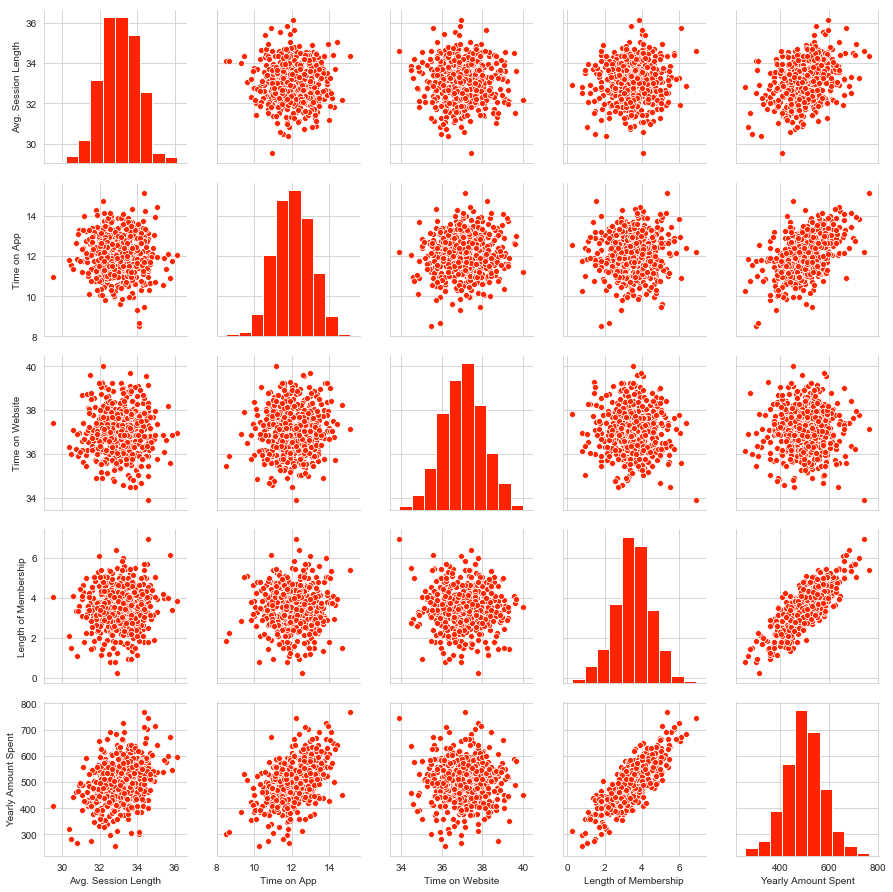

In [14]:
sns.pairplot(df)

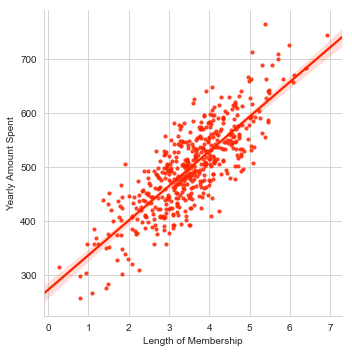

In [15]:
sns.lmplot('Length of Membership','Yearly Amount Spent', df, scatter_kws={"s": 10})

In [16]:
X = df[['Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership']]
X.shape

(500, 4)

In [17]:
y =df[['Yearly Amount Spent']]
y.shape

(500, 1)

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
line = LinearRegression()

** Train/fit lm on the training data.**


In [23]:

line.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [24]:
line.score(X_test,y_test)

0.9890046246741232

In [25]:
line.coef_

array([[25.98154972, 38.59015875,  0.19040528, 61.27909654]])

In [30]:
pridict_y = line.predict(X_test)

** Create a scatterplot of the real test values versus the predicted values. **

Text(0, 0.5, 'Predicted Y')

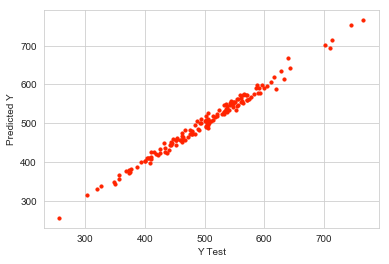

In [38]:
plt.scatter(y_test, pridict_y, s=10)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

## Evaluating the Model


** Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error. Refer to the lecture or to Wikipedia for the formulas**

In [40]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,explained_variance_score

In [41]:
print(mean_absolute_error(y_test, pridict_y))
print(mean_squared_error(y_test, pridict_y))
print(np.sqrt(mean_squared_error(y_test, pridict_y)))
print(explained_variance_score(y_test, pridict_y))
print(line.score(X_test, y_test))

7.228148653430853
79.81305165097487
8.933815066978656
0.9890771231889606
0.9890046246741232


## Conclusion
We still want to figure out the answer to the original question, do we focus our efforst on mobile app or website development? Or maybe that doesn't even really matter, and Membership Time is what is really important.  Let's see if we can interpret the coefficients at all to get an idea.


In [42]:
coeffecients = pd.DataFrame(np.array(line.coef_).reshape(-1,1),X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097
